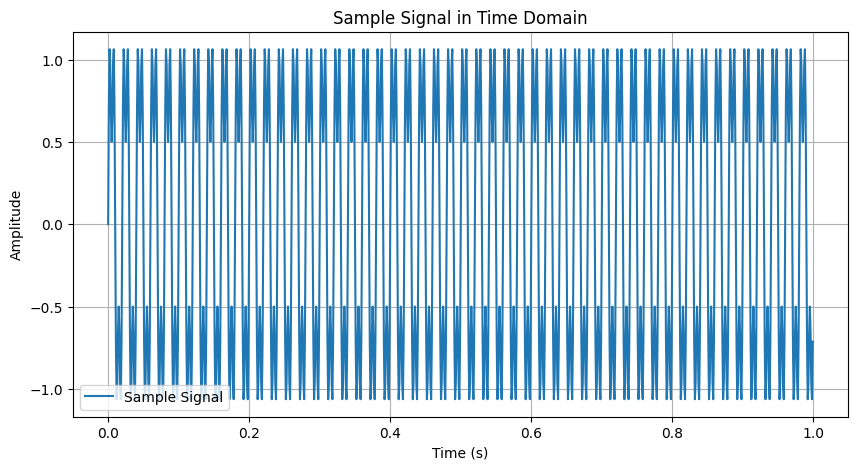

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window, welch
# Generate a Sample Signal
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
f1, f2 = 50, 150  # Frequencies of the sine waves (Hz)
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Plot the Sample Signal
plt.figure(figsize=(10, 5))
plt.plot(t, signal, label="Sample Signal")
plt.title("Sample Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

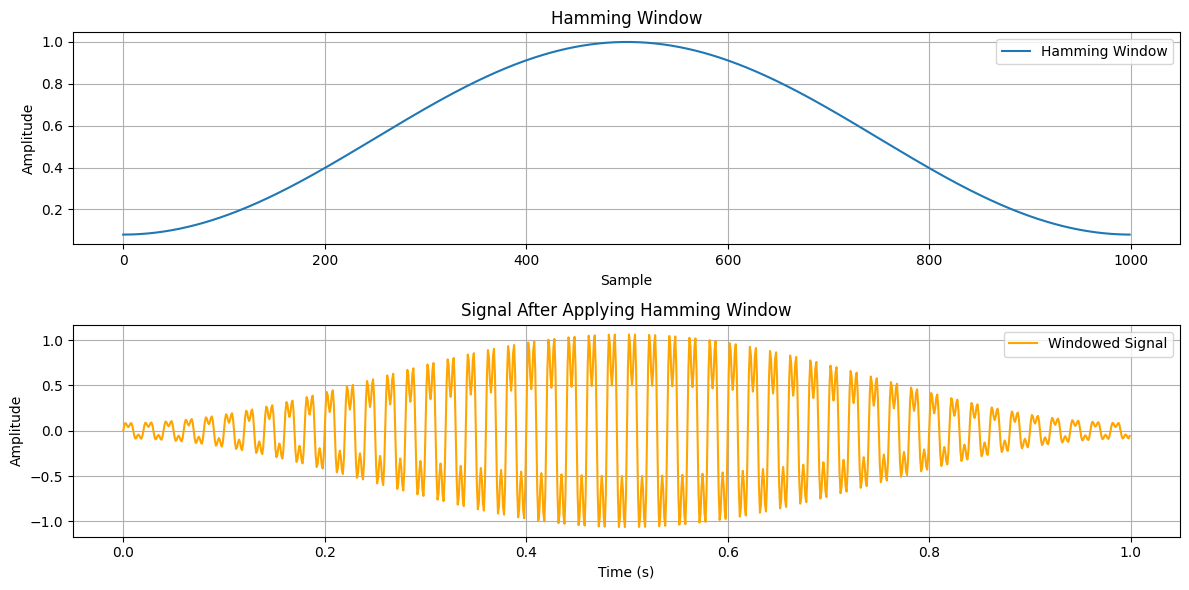

In [2]:
# Apply Hamming Window
hamming_window = get_window('hamming', len(signal))
windowed_signal = signal * hamming_window

# Plot the Hamming Window and the Windowed Signal
plt.figure(figsize=(12, 6))

# Subplot 1: Hamming Window
plt.subplot(2, 1, 1)
plt.plot(hamming_window, label="Hamming Window")
plt.title("Hamming Window")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# Subplot 2: Windowed Signal
plt.subplot(2, 1, 2)
plt.plot(t, windowed_signal, label="Windowed Signal", color='orange')
plt.title("Signal After Applying Hamming Window")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

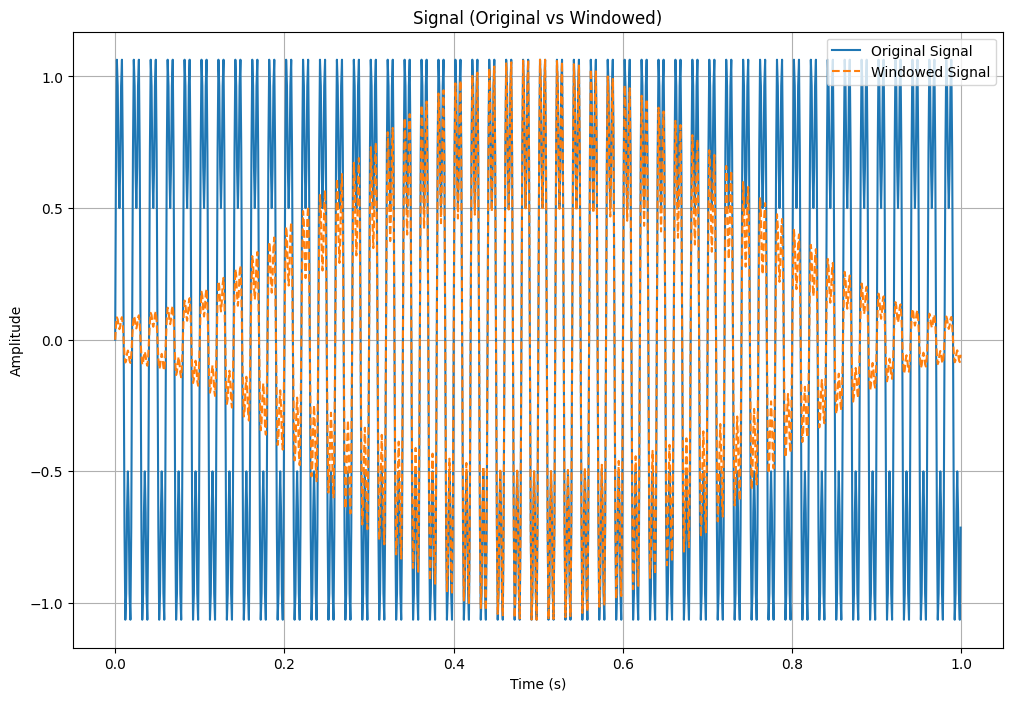

In [3]:
# Visualization
plt.figure(figsize=(12, 8))

# Plot Original and Windowed Signals
plt.plot(t, signal, label="Original Signal")
plt.plot(t, windowed_signal, label="Windowed Signal", linestyle='--')
plt.title("Signal (Original vs Windowed)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

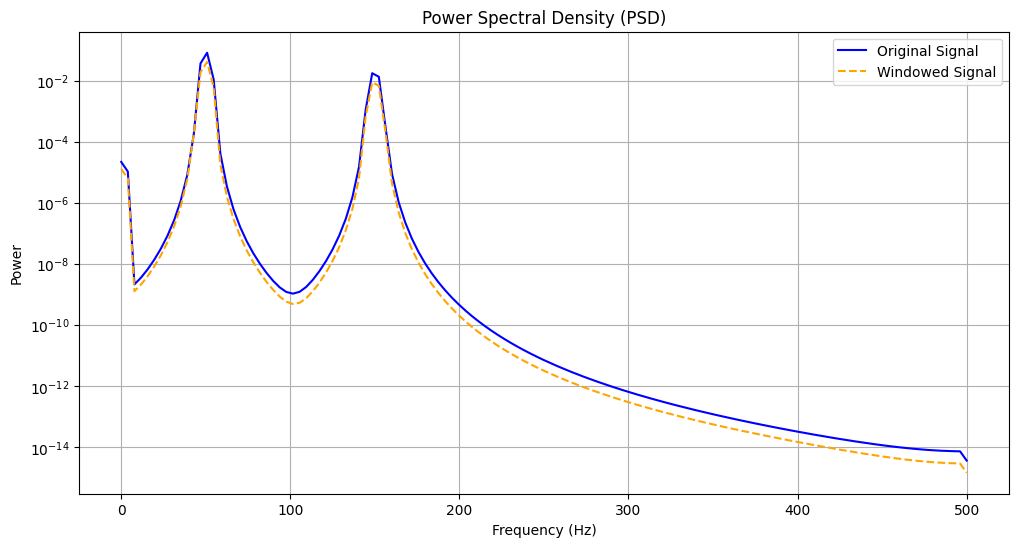

In [4]:
# Compute the Frequency Spectrum
f_original, Pxx_original = welch(signal, fs=fs, nperseg=256)
f_windowed, Pxx_windowed = welch(windowed_signal, fs=fs, nperseg=256)

# Plot the Frequency Spectrum
plt.figure(figsize=(12, 6))

# Plot Original Signal Spectrum
plt.semilogy(f_original, Pxx_original, label="Original Signal", color='blue')
# Plot Windowed Signal Spectrum
plt.semilogy(f_windowed, Pxx_windowed, label="Windowed Signal", color='orange', linestyle='--')

# Customize the Plot
plt.title("Power Spectral Density (PSD)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid()
plt.legend()

plt.show()